In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv("iris_dataset.csv")
ads_data = pd.read_csv("advertising_dataset.csv") 


# Question 1

In [60]:
class MyLinReg_Mod(object):

    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha = 0.001, epochs = 10):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]

        for _ in range(epochs):
            errors = 0
            sum_1 = 0
            sum_2 = 0
            for xi, yi in zip(X, y):
                sum_1 += (self.predict(xi) - yi)*xi
                sum_2 += (self.predict(xi) - yi)
                errors += ((self.predict(xi) - yi)**2)
            self.theta[:-1] -= 2*alpha*sum_1/n
            self.theta[-1] -= 2*alpha*sum_2/n
            self.errors.append(errors/n)
            
            if _ > 2:
                if(self.errors[-2]-self.errors[-1])/self.errors[-2] < 0.01:
                    break
            
        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)
    
    
def identity_function(z):
    return z

In [61]:
df = df.iloc[:50][["sepal_length", "sepal_width"]]
X = df[['sepal_length']].to_numpy()
y = df['sepal_width'].to_numpy()


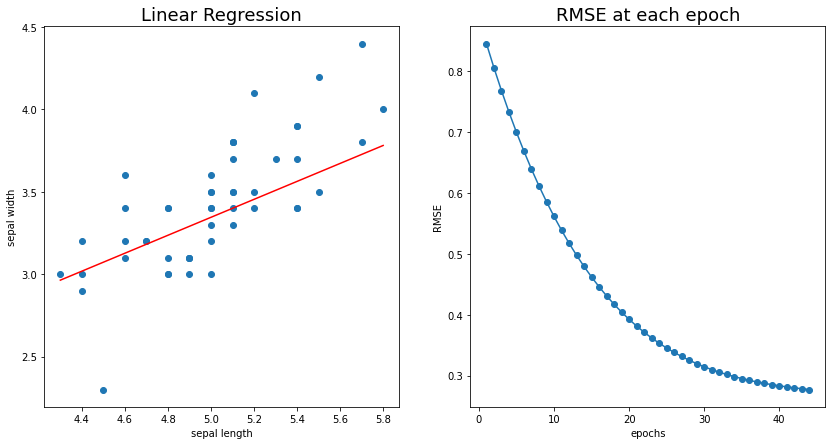

In [56]:
model = MyLinReg_Mod(identity_function)
model.fit(X, y, alpha = 0.001, epochs = 100)

domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1), 
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch", fontsize = 18);

In [66]:
class MyLinReg_Soc(object):

    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha = 0.001, epochs = 10):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]
        
        for _ in range(epochs):
            errors = 0
            for xi, yi in zip(X, y):
                error = self.predict(xi)-yi
                errors += (error**2)
                self.theta[:-1] -= 2 * alpha * error * xi
                self.theta[-1] -= 2 * alpha * error
                
                
            self.errors.append(errors/n)
            
            #if _ > 2:
             #   if ((self.errors[-2]-self.errors[-1])/self.errors[-2]) < 0.01:
              #      print(_)
               #     break 

            
        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

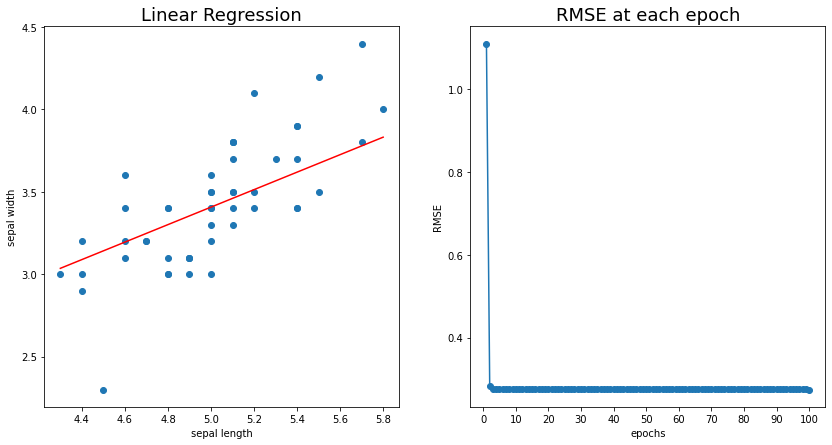

In [67]:
model = MyLinReg_Soc(identity_function)
model.fit(X, y, alpha = 0.001, epochs = 100)

domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1), 
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch", fontsize = 18);

# Question 2

In [43]:
X = ads_data[['TV', 'radio']]
y = ads_data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train)

w = reg.coef_
b = reg.intercept_

print(f"The linear regression model based on the training data is \n")
print(f"predicted_sales = {np.round(w[0],3)} * TV + {np.round(w[1],3)} * radio + {np.round(b,3)}")

mse_train = mean_squared_error(y_train, reg.predict(X_train))
mse_test = mean_squared_error(y_test, reg.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

The linear regression model based on the training data is 

predicted_sales = 0.044 * TV + 0.203 * radio + 2.838
RMSE on the training data: 1.5802375959959865

RMSE on the test data: 1.9154756731764255


# Question 3
The best attributes to use on the linear regression models were displacement and weight. I attempted to use drat in addition with these attributes although it yielded slightly worse results. 
    
    
Overall in both observations the best model was sklearn's linear regression model that produced a MSE of 2.69 and 2.98 for the training and test set respectively.

In addition to the observations I showed each models predictions along with their residual values comparative to what the actual mpg for that entry were.

first removing the attributes that are not continous

In [44]:
cars_df = pd.read_csv('mtcars.csv')
cars_df = cars_df.drop(['cyl', 'vs', 'am', 'gear', 'carb', 'hp'], axis = 1)
print(cars_df.corr())


           mpg      disp      drat        wt      qsec
mpg   1.000000 -0.847551  0.681172 -0.867659  0.418684
disp -0.847551  1.000000 -0.710214  0.887980 -0.433698
drat  0.681172 -0.710214  1.000000 -0.712441  0.091205
wt   -0.867659  0.887980 -0.712441  1.000000 -0.174716
qsec  0.418684 -0.433698  0.091205 -0.174716  1.000000


In [45]:
X = cars_df[['disp', 'wt']]
y = cars_df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

lin_reg = LinearRegression()
sgd_reg = SGDRegressor(max_iter = 1500)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg.fit(X_train, y_train)
sgd_reg.fit(X_train_scaled, y_train)

w_1 = lin_reg.coef_
w_2 = sgd_reg.coef_

b_1 = lin_reg.intercept_
b_2 = sgd_reg.intercept_

mse_lin_train = mean_squared_error(y_train, lin_reg.predict(X_train))
mse_lin_test = mean_squared_error(y_test, lin_reg.predict(X_test))

mse_sgd_train = mean_squared_error(y_train, sgd_reg.predict(X_train_scaled))
mse_sgd_test = mean_squared_error(y_test, sgd_reg.predict(X_test_scaled))

print(f"The linear regression model based on the training data is:")
print(f"predicted_sales = {np.round(w_1[0],3)} * disp + {np.round(w_1[1],3)} * wt + {np.round(b_1,3)} \n")

print(f"RMSE on the training data: {np.sqrt(mse_lin_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_lin_test)} \n")

print(f"The SGD regression model based on the training data is:")
print(f"predicted_sales = {np.round(w_2[0],3)} * disp + {np.round(w_2[1],3)} * wt + {np.round(b_2,3)} \n")

print(f"RMSE on the training data: {np.sqrt(mse_sgd_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_sgd_test)}")

The linear regression model based on the training data is:
predicted_sales = -0.021 * disp + -3.09 * wt + 34.697 

RMSE on the training data: 2.690674899382404

RMSE on the test data: 2.985476255488697 

The SGD regression model based on the training data is:
predicted_sales = -9.987 * disp + -6.984 * wt + [26.96] 

RMSE on the training data: 2.8182799079316014

RMSE on the test data: 3.0657019950635975


In [46]:
pred_mpg_lin = lin_reg.predict(X_test)
pred_mpg_sgd = sgd_reg.predict(X_test_scaled)

pred_mpg_lin
print(pred_mpg_lin)

car_test_df = pd.DataFrame(X_test)
car_test_df['mpg'] = y_test

car_test_df['Lin pred mpg'] = pred_mpg_lin
car_test_df['Lin_residual'] = pred_mpg_lin - car_test_df['mpg']
car_test_df['SGD pred mpg'] = pred_mpg_sgd
car_test_df['SGD_residual'] = pred_mpg_sgd - car_test_df['mpg']



print(f"Min Risdual: {np.round(car_test_df['Lin_residual'].min(), 3)}, Max Residual: {np.round(car_test_df['Lin_residual'], 3).max()} \n")
print(f"Min Risdual: {np.round(car_test_df['SGD_residual'].min(), 3)}, Max Residual: {np.round(car_test_df['SGD_residual'], 3).max()} \n")


car_test_df

[23.12310272  8.37181362 14.49826454 26.26310827 22.03638103 20.5829962
 17.40690826 27.07563008 17.4366674  23.27458488]
Min Risdual: -6.137, Max Residual: 3.423 

Min Risdual: -6.882, Max Residual: 3.128 



,disp,wt,mpg,Lin pred mpg,Lin_residual,SGD pred mpg,SGD_residual
29,145.0,2.770,19.7,23.123103,3.423103,22.828009,3.128009
15,460.0,5.424,10.4,8.371814,-2.028186,10.144277,-0.255723
24,400.0,3.845,19.2,14.498265,-4.701735,14.516646,-4.683354
17,78.7,2.200,32.4,26.263108,-6.136892,25.518402,-6.881598
8,140.8,3.150,22.8,22.036381,-0.763619,22.240079,-0.559921
9,167.6,3.440,19.2,20.582996,1.382996,21.043952,1.843952
30,301.0,3.570,15.0,17.406908,2.406908,17.483971,2.483971
25,79.0,1.935,27.3,27.075630,-0.224370,25.993894,-1.306106
12,275.8,3.730,17.3,17.436667,0.136667,17.820113,0.520113
0,160.0,2.620,21.0,23.274585,2.274585,22.727728,1.727728


In [47]:
X_2 = cars_df[['wt', 'disp', 'drat']]
y_2 = cars_df['mpg']
y_2

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.3, random_state=42)

lin_reg = LinearRegression()
sgd_reg = SGDRegressor(max_iter = 1500)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg.fit(X_train, y_train)
sgd_reg.fit(X_train_scaled, y_train)

w_1 = lin_reg.coef_
w_2 = sgd_reg.coef_

b_1 = lin_reg.intercept_
b_2 = sgd_reg.intercept_

mse_lin_train = mean_squared_error(y_train, lin_reg.predict(X_train))
mse_lin_test = mean_squared_error(y_test, lin_reg.predict(X_test))

mse_sgd_train = mean_squared_error(y_train, sgd_reg.predict(X_train_scaled))
mse_sgd_test = mean_squared_error(y_test, sgd_reg.predict(X_test_scaled))

print(f"The linear regression model based on the training data is:")
print(f"MPG = {np.round(w_1[0],3)} * wt + {np.round(w_1[1],3)} * disp + {np.round(w_1[2], 3)} * drat + {np.round(b_1,3)} \n")

print(f"RMSE on the training data: {np.sqrt(mse_lin_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_lin_test)} \n")

print(f"The SGD regression model based on the training data is:")
print(f"MPG = {np.round(w_2[0],3)} * wt + {np.round(w_2[1],3)} * disp + {np.round(w_2[2], 3)} * drat + {np.round(b_2,3)} \n")

print(f"RMSE on the training data: {np.sqrt(mse_sgd_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_sgd_test)} \n")

pred_mpg_lin = lin_reg.predict(X_test)
pred_mpg_sgd = sgd_reg.predict(X_test_scaled)

car_test_df = pd.DataFrame(X_test)
car_test_df['mpg'] = y_test
car_test_df['Lin_pred mpg'] = pred_mpg_lin
car_test_df['Lin_residual'] = pred_mpg_lin - car_test_df['mpg']
car_test_df['SGD_pred mpg'] = pred_mpg_sgd
car_test_df['SGD_residual'] = pred_mpg_sgd - car_test_df['mpg']


print(f"Linear Regression Min Risdual: {np.round(car_test_df['Lin_residual'].min(), 3)}, Max Residual: {np.round(car_test_df['Lin_residual'], 3).max()} \n")
print(f"SGD Regression Min Risdual: {np.round(car_test_df['SGD_residual'].min(), 3)}, Max Residual: {np.round(car_test_df['SGD_residual'], 3).max()} \n")

car_test_df

The linear regression model based on the training data is:
MPG = -2.829 * wt + -0.02 * disp + 0.894 * drat + 30.443 

RMSE on the training data: 2.665414704806622

RMSE on the test data: 2.989074280654205 

The SGD regression model based on the training data is:
MPG = -4.042 * wt + -6.611 * disp + 10.13 * drat + [20.425] 

RMSE on the training data: 3.1458626939398187

RMSE on the test data: 3.2007941176893624 

Linear Regression Min Risdual: -6.099, Max Residual: 3.26 

SGD Regression Min Risdual: -6.663, Max Residual: 3.105 



,wt,disp,drat,mpg,Lin_pred mpg,Lin_residual,SGD_pred mpg,SGD_residual
29,2.770,145.0,3.62,19.7,22.960099,3.260099,21.895120,2.195120
15,5.424,460.0,3.00,10.4,8.637176,-1.762824,11.006795,0.606795
24,3.845,400.0,3.08,19.2,14.368427,-4.831573,14.035363,-5.164637
17,2.200,78.7,4.08,32.4,26.301480,-6.098520,25.737070,-6.662930
8,3.150,140.8,3.92,22.8,22.236587,-0.563413,22.963966,0.163966
9,3.440,167.6,3.92,19.2,20.883512,1.683512,22.216112,3.016112
30,3.570,301.0,3.54,15.0,17.525026,2.525026,18.105325,3.105325
25,1.935,79.0,4.08,27.3,27.045267,-0.254733,26.011679,-1.288321
12,3.730,275.8,3.07,17.3,17.153070,-0.146930,16.158023,-1.141977
0,2.620,160.0,3.90,21.0,23.336649,2.336649,23.113110,2.113110


In [48]:
X_2 = cars_df[['wt', 'disp', 'drat', 'qsec']]
y_2 = cars_df['mpg']
y_2

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.3, random_state=42)

lin_reg = LinearRegression()
sgd_reg = SGDRegressor(max_iter = 1500)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg.fit(X_train, y_train)
sgd_reg.fit(X_train_scaled, y_train)

w_1 = lin_reg.coef_
w_2 = sgd_reg.coef_

b_1 = lin_reg.intercept_
b_2 = sgd_reg.intercept_

mse_lin_train = mean_squared_error(y_train, lin_reg.predict(X_train))
mse_lin_test = mean_squared_error(y_test, lin_reg.predict(X_test))

mse_sgd_train = mean_squared_error(y_train, sgd_reg.predict(X_train_scaled))
mse_sgd_test = mean_squared_error(y_test, sgd_reg.predict(X_test_scaled))

print(f"The linear regression model based on the training data is:")
print(f"MPG = {np.round(w_1[0],3)} * wt + {np.round(w_1[1],3)} * disp + {np.round(w_1[2], 3)} * drat + {np.round(b_1,3)} \n")

print(f"RMSE on the training data: {np.sqrt(mse_lin_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_lin_test)} \n \n \n")

print(f"The SGD regression model based on the training data is:")
print(f"MPG = {np.round(w_2[0],3)} * wt + {np.round(w_2[1],3)} * disp + {np.round(w_2[2], 3)} * drat + {np.round(b_2,3)} \n")

print(f"RMSE on the training data: {np.sqrt(mse_sgd_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_sgd_test)} \n \n \n")

pred_mpg_lin = lin_reg.predict(X_test)
pred_mpg_sgd = sgd_reg.predict(X_test_scaled)

car_test_df = pd.DataFrame(X_test)
car_test_df['mpg'] = y_test
car_test_df['Lin_pred mpg'] = pred_mpg_lin
car_test_df['Lin_residual'] = pred_mpg_lin - car_test_df['mpg']
car_test_df['SGD_pred mpg'] = pred_mpg_sgd
car_test_df['SGD_residual'] = pred_mpg_sgd - car_test_df['mpg']


print(f"Linear Regression Min Risdual: {np.round(car_test_df['Lin_residual'].min(), 3)}, Max Residual: {np.round(car_test_df['Lin_residual'], 3).max()} \n")
print(f"SGD Regression Min Risdual: {np.round(car_test_df['SGD_residual'].min(), 3)}, Max Residual: {np.round(car_test_df['SGD_residual'], 3).max()} \n")

car_test_df

The linear regression model based on the training data is:
MPG = -4.595 * wt + 0.006 * disp + 2.459 * drat + 1.553 

RMSE on the training data: 2.3883491573418936

RMSE on the test data: 2.538830348284378 
 
 

The SGD regression model based on the training data is:
MPG = -4.346 * wt + -3.291 * disp + 10.529 * drat + [14.102] 

RMSE on the training data: 2.938165081459942

RMSE on the test data: 3.5510340019349007 
 
 

Linear Regression Min Risdual: -5.485, Max Residual: 4.112 

SGD Regression Min Risdual: -5.352, Max Residual: 6.979 



,wt,disp,drat,qsec,mpg,Lin_pred mpg,Lin_residual,SGD_pred mpg,SGD_residual
29,2.770,145.0,3.62,15.50,19.7,18.447152,-1.252848,17.728016,-1.971984
15,5.424,460.0,3.00,17.82,10.4,9.501229,-0.898771,12.569775,2.169775
24,3.845,400.0,3.08,17.05,19.2,15.623040,-3.576960,14.097544,-5.102456
17,2.200,78.7,4.08,19.47,32.4,26.914574,-5.485426,27.047857,-5.352143
8,3.150,140.8,3.92,22.90,22.8,26.912065,4.112065,29.779247,6.979247
9,3.440,167.6,3.92,18.30,19.2,19.828735,0.628735,22.397408,3.197408
30,3.570,301.0,3.54,14.60,15.0,14.309042,-0.690958,13.814915,-1.185085
25,1.935,79.0,4.08,18.90,27.3,27.402416,0.102416,26.499248,-0.800752
12,3.730,275.8,3.07,17.60,17.3,16.124419,-1.175581,16.016111,-1.283889
0,2.620,160.0,3.90,16.46,21.0,21.142629,0.142629,20.559571,-0.440429
